In [2]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#To Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_data = pd.read_excel(r"D:\Machine_learning\regression\AirlinePrice_predict\Train_Data.xlsx", sheet_name = "Sheet1")

test_data = pd.read_excel(r"D:\Machine_learning\regression\AirlinePrice_predict\Test_Data.xlsx", sheet_name = "Sheet1")

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.shape

(10683, 11)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
# check duplicacy of data

train_data.duplicated().sum()

220

In [9]:
#drop duplicates values
train_data.drop_duplicates(inplace=True)

In [10]:
train_data.duplicated().sum()

0

In [11]:
train_data.dropna(inplace= True)

In [12]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
train_data['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [14]:
train_data['Duration'].value_counts()

2h 50m     544
1h 30m     386
2h 45m     335
2h 55m     332
2h 35m     329
          ... 
30h 25m      1
30h 15m      1
42h 5m       1
28h 55m      1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [15]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [16]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [17]:
train_data['Day'] = pd.to_datetime(train_data['Date_of_Journey']).dt.day

In [18]:
train_data['Month'] = pd.to_datetime(train_data['Date_of_Journey']).dt.month

In [19]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1


In [20]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [21]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [22]:
train_data.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50


In [23]:
#Arrival Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [24]:
train_data.head(7)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,18,55,10,25


In [25]:
duration =  list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:   # Check if duration contains only hour or mins
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]
        
duration_hour = []
duration_mins = []

for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep = 'h')[0]))  # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1])) # Extracts only minutes from duration

In [26]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data['Duration_hours'] = duration_hour
train_data['Duration_mins'] = duration_mins

In [27]:
train_data.drop(["Duration"], axis=1, inplace = True)

In [28]:
train_data.head(4)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25


In [ ]:
# Handling Categorical Data

# Nominal data --> data are not in any order --> "OneHotEncoder" is used in this case
# Ordinal data** --> data are in order --> "LabelEncoder" is used in this case

In [29]:
train_data['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

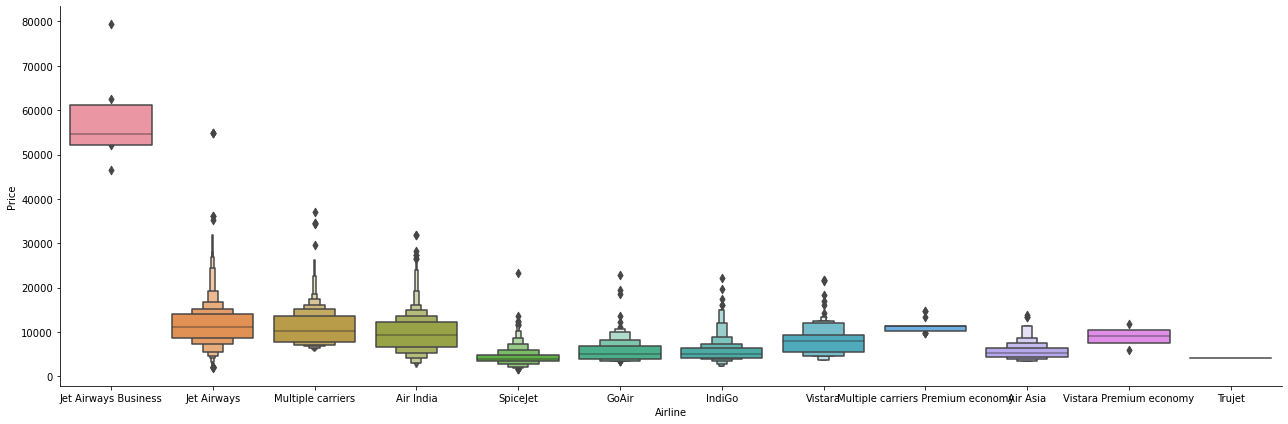

In [30]:
# From graph we can see that Jet Airways Business have the highest Price, rest having almost same price

sns.catplot(x = "Airline" ,y = "Price",data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [31]:
Airline = pd.get_dummies(train_data["Airline"], drop_first= True)

Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [32]:
train_data['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

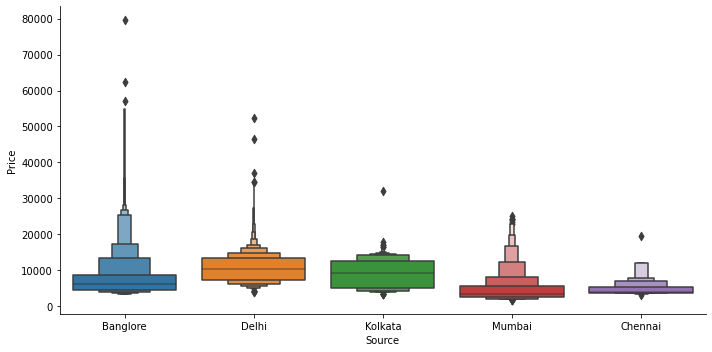

In [33]:
# showing Source and price 

sns.catplot(x = 'Source' , y= "Price", data = train_data.sort_values("Price", ascending=False), kind= 'boxen', aspect=2)

In [34]:
Source = pd.get_dummies(train_data["Source"],prefix = "Source",drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [35]:
train_data["Destination"].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [36]:
Destination = pd.get_dummies(train_data["Destination"],prefix = "Destination",drop_first= True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [37]:
train_data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25


In [38]:
train_data.drop(["Route", "Additional_Info"], axis=1, inplace=True)

In [39]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [40]:
train_data['Total_Stops'].replace({
    'non-stop' : 0,
    '1 stop' : 1,
    '2 stops' : 2,
    '3 stops' : 3,
    '4 stops' : 4   
}, inplace=True )

In [41]:
train_data.head(4)

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,25


In [42]:
train_data =  pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [43]:
pd.set_option('display.max_columns', None)

In [44]:
train_data.head(3)

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [45]:
train_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [46]:
train_data.head(2)

,Total_Stops,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [47]:
train_data.dtypes

Total_Stops                          int64
Price                                int64
Day                                  int64
Month                                int64
Dep_hour                             int64
Dep_min                              int64
Arrival_hour                         int64
Arrival_min                          int64
Duration_hours                       int64
Duration_mins                        int64
Air India                            uint8
GoAir                                uint8
IndiGo                               uint8
Jet Airways                          uint8
Jet Airways Business                 uint8
Multiple carriers                    uint8
Multiple carriers Premium economy    uint8
SpiceJet                             uint8
Trujet                               uint8
Vistara                              uint8
Vistara Premium economy              uint8
Source_Chennai                       uint8
Source_Delhi                         uint8
Source_Kolk

In [ ]:
# Test Data

In [48]:
test_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info


In [49]:
# Preprocessing Test Data

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data["Date_of_Journey"]).dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"]).dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [50]:
data_test.head(2)

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,5,12,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


<AxesSubplot:>

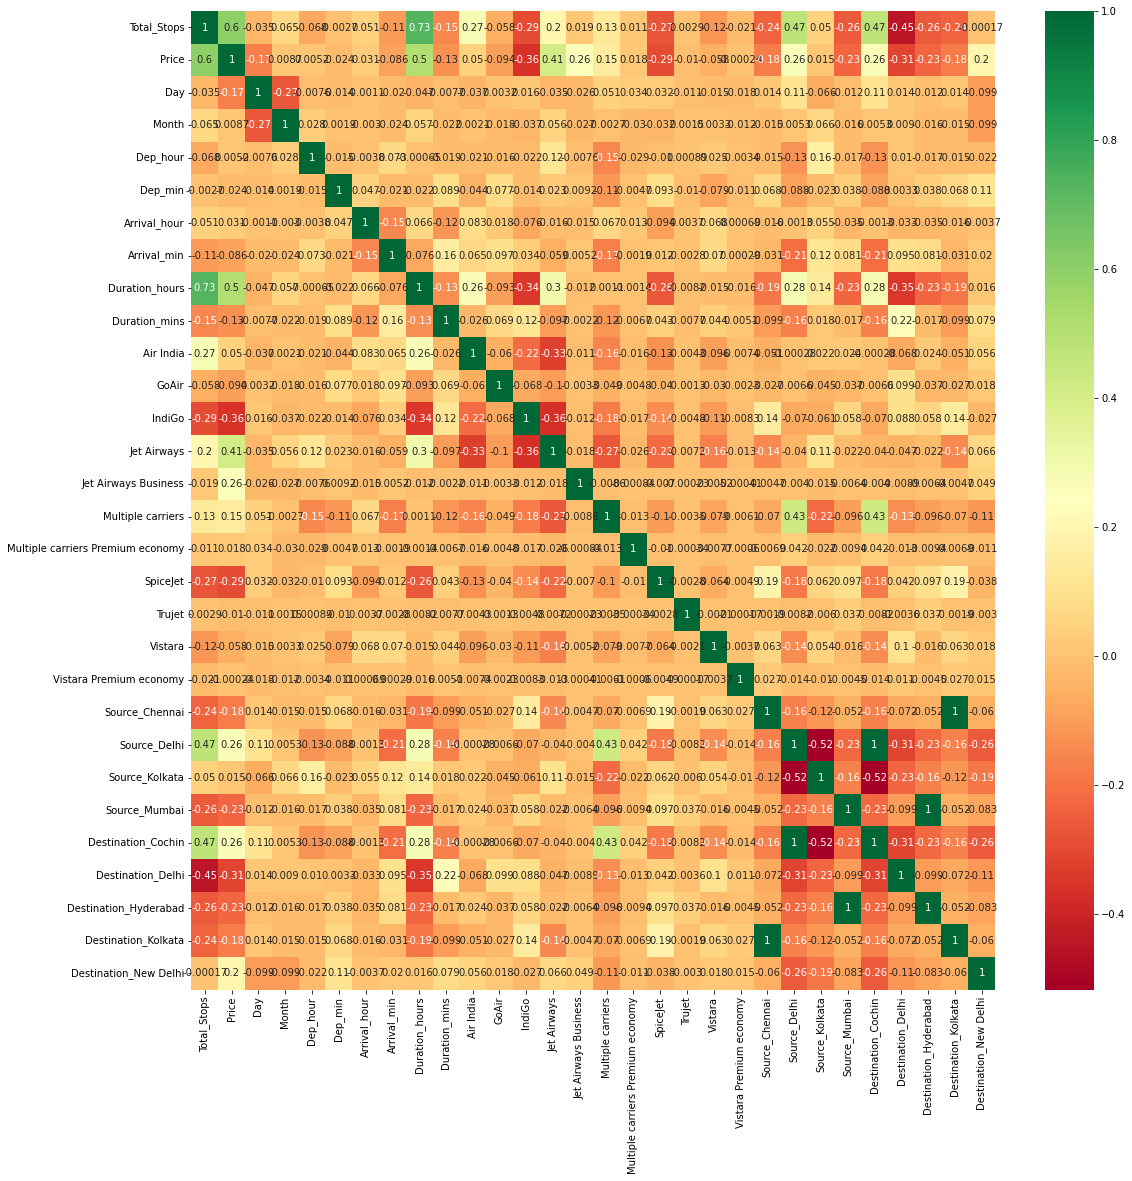

In [51]:
plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

In [52]:
train_data.columns

Index(['Total_Stops', 'Price', 'Day', 'Month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [53]:
X = train_data.drop('Price', axis=1)
y = train_data['Price']

In [54]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [55]:
X.head(2)

,Total_Stops,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [56]:
# Important feature using ExtraTreesRegressor


from sklearn.ensemble import ExtraTreesRegressor

feature_selection = ExtraTreesRegressor()
feature_selection.fit(X, y)

ExtraTreesRegressor()

In [57]:
print(feature_selection.feature_importances_)

[2.05787054e-01 1.09868496e-01 8.55505257e-02 2.55439949e-02
 2.18980756e-02 2.92017704e-02 2.06868305e-02 1.40846005e-01
 1.75694694e-02 1.19307734e-02 1.62787064e-03 1.49585445e-02
 1.36972083e-01 6.82029102e-02 2.09782853e-02 1.05060375e-03
 2.93444466e-03 8.52295094e-05 5.43079173e-03 1.30682593e-04
 5.25292672e-04 1.04263550e-02 4.01205820e-03 7.31931791e-03
 1.09178628e-02 1.59907750e-02 5.73683729e-03 6.35946957e-04
 2.31811142e-02]


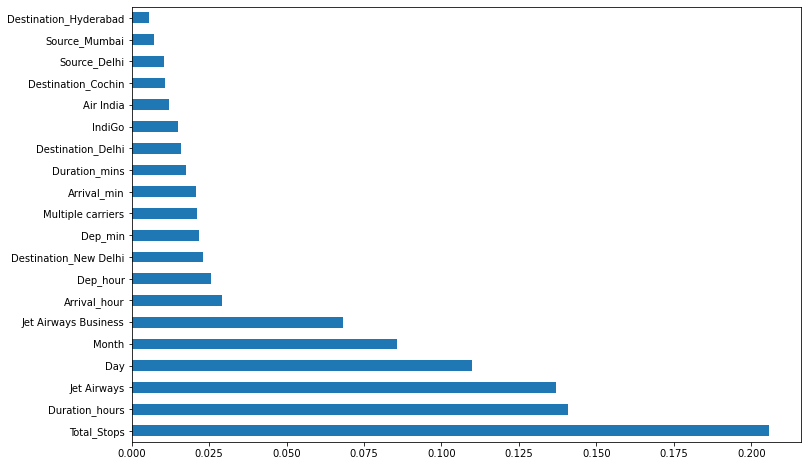

In [58]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(feature_selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [60]:
X_scaled = scaler.fit_transform(X)

In [61]:
new_df = pd.DataFrame(X_scaled, columns = X.columns)

In [62]:
new_df.head()

,Total_Stops,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,-1.214593,1.293326,-0.846221,1.662578,-0.234123,-1.807045,-0.888367,-0.958051,1.290990,-0.439548,-0.137454,2.030000,-0.739713,-0.023955,-0.359269,-0.035272,-0.290658,-0.009777,-0.218807,-0.016936,-0.194406,-0.842802,-0.613365,-0.267165,-0.842802,-0.37087,-0.267165,-0.194406,3.232087
1,1.813062,-0.867922,-1.513956,-1.305841,1.360364,-0.056554,-0.586611,-0.361223,-0.190195,2.275064,-0.137454,-0.492611,-0.739713,-0.023955,-0.359269,-0.035272,-0.290658,-0.009777,-0.218807,-0.016936,-0.194406,-0.842802,1.630350,-0.267165,-0.842802,-0.37087,-0.267165,-0.194406,-0.309398
2,1.813062,-0.754172,1.156984,-0.607390,0.031625,-1.369422,0.016902,1.071164,-1.671380,-0.439548,-0.137454,-0.492611,1.351876,-0.023955,-0.359269,-0.035272,-0.290658,-0.009777,-0.218807,-0.016936,-0.194406,1.186518,-0.613365,-0.267165,1.186518,-0.37087,-0.267165,-0.194406,-0.309398
3,0.299235,-0.867922,2.158586,0.964126,-1.031367,1.402189,0.318658,-0.599954,-0.190195,-0.439548,-0.137454,2.030000,-0.739713,-0.023955,-0.359269,-0.035272,-0.290658,-0.009777,-0.218807,-0.016936,-0.194406,-0.842802,1.630350,-0.267165,-0.842802,-0.37087,-0.267165,-0.194406,-0.309398
4,0.299235,-1.095422,-1.513956,0.614900,1.360364,1.110440,0.620415,-0.719320,0.994753,-0.439548,-0.137454,2.030000,-0.739713,-0.023955,-0.359269,-0.035272,-0.290658,-0.009777,-0.218807,-0.016936,-0.194406,-0.842802,-0.613365,-0.267165,-0.842802,-0.37087,-0.267165,-0.194406,3.232087


In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=101 )

In [65]:
from sklearn.model_selection import GridSearchCV

In [68]:
def find_best_model(x,y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize': [True, False]
            }
        },
        
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha': [0.001, 0.01, 0.1, 1, 10],
                'selection': ['random', 'cyclic']
            }
        },
        
        'Ridge' : {
            'model' : Ridge(),
            'params' : {
                'alpha' : [0.001, 0.01, 0.1, 1, 10]
            }
        }
    }
    
    scores = []
    for algo_name, model in algos.items():
        gs = GridSearchCV(model['model'], model['params'], cv = 5 )
        gs.fit(x,y)
        scores.append({
            'model' : algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [69]:
find_best_model(X_train, y_train)

,model,best_score,best_params
0,linear_regression,0.611405,{'normalize': True}
1,lasso,0.611478,"{'alpha': 10, 'selection': 'random'}"
2,Ridge,0.611402,{'alpha': 10}


In [70]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [71]:
y_pred = rf_model.predict(X_test)

In [72]:
rf_model.score(X_train, y_train)

0.9529854579327625

In [73]:
rf_model.score(X_test, y_test)

0.7874019403072906

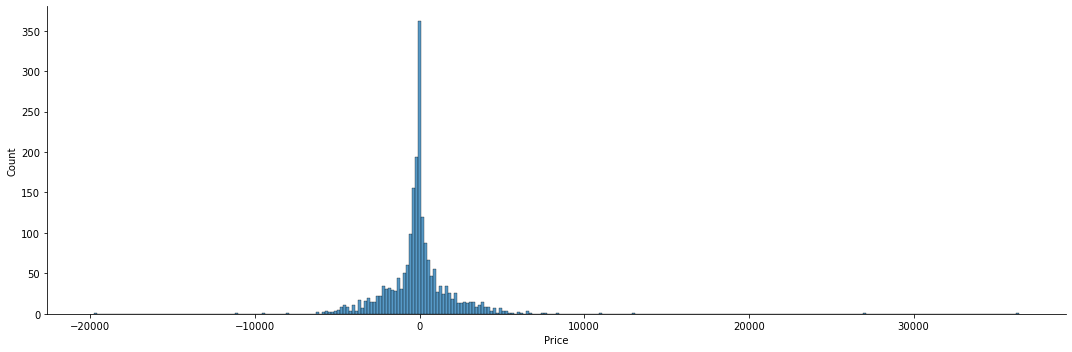

In [74]:
sns.displot(y_test-y_pred, aspect=3)

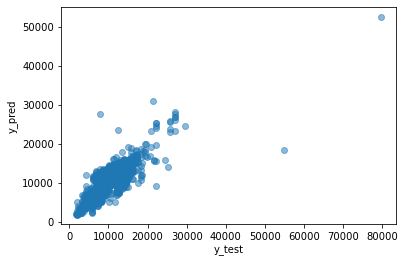

In [75]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [77]:
print("mean_absolute_error : ", mean_absolute_error(y_test, y_pred))
print("mean_squared_error : ", mean_squared_error(y_test, y_pred))
print("rmse : ",np.sqrt( mean_squared_error(y_test, y_pred)))
print("r2_score : ", r2_score(y_test, y_pred))

mean_absolute_error :  1221.1842200987417
mean_squared_error :  4561238.324598316
rmse :  2135.70558003633
r2_score :  0.7874019403072906


In [78]:
from sklearn.model_selection import RandomizedSearchCV

In [79]:
params = {
    'n_estimators' : [int(x) for x in np.linspace(100,1200, num = 7)],  # Number of trees in random forest
    'max_features' : ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth' : [int(x) for x in np.linspace(5, 30, num =6)]  # Maximum number of levels in tree
}

In [80]:
Randomized_model = RandomizedSearchCV(rf_model, params, cv=5, verbose=2)

In [81]:
Randomized_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .max_depth=20, max_features=sqrt, n_estimators=1016; total time=  15.7s
[CV] END .max_depth=20, max_features=sqrt, n_estimators=1016; total time=  15.3s
[CV] END .max_depth=20, max_features=sqrt, n_estimators=1016; total time=  15.5s
[CV] END .max_depth=20, max_features=sqrt, n_estimators=1016; total time=  16.3s
[CV] END .max_depth=20, max_features=sqrt, n_estimators=1016; total time=  16.1s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=650; total time=   3.0s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=650; total time=   2.7s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=650; total time=   3.0s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=650; total time=   2.9s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=650; total time=   2.9s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=283; total time=   4.4s
[CV] END ..max_depth=20, max_features=sqrt, n_es

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 283, 466, 650,
                                                         833, 1016, 1200]},
                   verbose=2)

In [82]:
Randomized_model.best_params_

{'n_estimators': 833, 'max_features': 'sqrt', 'max_depth': 15}

In [83]:
Randomized_model.best_score_

0.8156930176482025

In [84]:
pred_res = Randomized_model.predict(X_test)

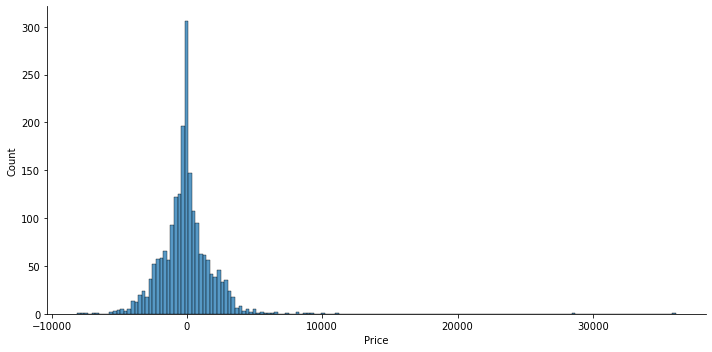

In [85]:
sns.displot(y_test - pred_res, aspect=2)

In [86]:
print("mean_absolute_error : ", mean_absolute_error(y_test, pred_res))
print("mean_squared_error : ", mean_squared_error(y_test, pred_res))
print("rmse : ",np.sqrt( mean_squared_error(y_test, pred_res)))
print("r2_score : ", r2_score(y_test, pred_res))

mean_absolute_error :  1291.8529720507624
mean_squared_error :  4228015.745674423
rmse :  2056.2139348021215
r2_score :  0.8029333527623193


In [87]:
# Saving the file in the Pickle format

import pickle

with open("Flightprice_pred", 'wb') as f:
    pickle.dump(rf_model, f)

In [88]:
# Using the Pickle file 

with open("Flightprice_pred", "rb") as f:
    model_file = pickle.load(f)

In [89]:
y_prediction = model_file.predict(X_test)

In [90]:
r2_score(y_test, y_prediction)

0.7874019403072906